In [ ]:
"""
    s = mybasel(N)

Calculate finite Basel sum
"""
function mybasel(N)
    s = 0.0
    for n = 1:N
        s += 1/n^2
    end
    return s
end

In [ ]:
round(abs(mybasel(2000) - pi^2/6), sigdigits=1)

In [ ]:

function myrichardson(N)
    s1 = mybasel(N) 
    s2 = mybasel(2*N)
    return 2*s2 - s1
end

In [ ]:

round(abs(myrichardson(1000) - pi^2/6), sigdigits=1)

In [ ]:

round(abs(mybasel(5000000) - pi^2/6), sigdigits=1)

In [ ]:
] add QuadGK

In [ ]:

using QuadGK

In [ ]:

fun1(x) = 1/sqrt(x)

In [ ]:

round(quadgk(fun1, 0.0, 1.0)[1], sigdigits=5)

In [ ]:

fun2(x) = exp(-x) * log(x)

In [ ]:

quadgk(fun2, 0.0, Inf)

In [ ]:

# quadgk does the integral multiple times for error estimate


# Euler's method for IVP

In [1]:

"""
    t, y = myeulers(fun, a, b, n, y1)

Solve IVP y' = fun(t, y), a <=t=  t <= b, y(a) = y1 using Euler's method.
Use the integration step h = (b - a)/(n - 1). Return a vector of values
of the independent variable t_i, and a vector of correspondinig values
of the solution, y(t_i)
"""
function myeulers(fun, a, b, n, y1)
    t = range(a, b, n)
    y = zeros(n)
    h = t[2] - t[1]
    y[1] = y1
    for i = 1: (n-1)
        y[i + 1] = y[i] + h * fun(t[i], y[i])
    end
    return t, y
end

myeulers

In [2]:

a = 0.0
b = 5.0
n = 64
y1 = 0.0
fun(t, y) = exp(-sin(t)) - y * cos(t)
yexact(t) = t * exp(-sin(t))

yexact (generic function with 1 method)

In [3]:

t, y = myeulers(fun, a, b, n, y1)

(0.0:0.07936507936507936:5.0, [0.0, 0.07936507936507936, 0.14640193018250997, 0.20269028461468805, 0.2497478530729569, 0.28900181860488144, 0.32177099820448435, 0.34925697539482514, 0.3725424425763906, 0.3925950689158003  …  9.922618991205706, 10.445763430536573, 10.931171825013662, 11.369030734090003, 11.750125683122171, 12.066226287320763, 12.310447408013015, 12.477561679832434, 12.56424103542065, 12.569209387626104])

In [4]:

using PyPlot

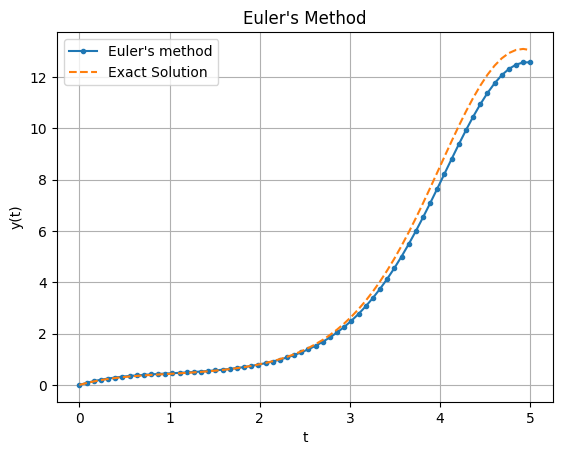

In [5]:

plot(t, y, label="Euler's method", marker=".")
plot(t, yexact.(t), label="Exact Solution", linestyle="dashed")
legend()
xlabel("t")
ylabel("y(t)")
title("Euler's Method")
grid(true)

In [6]:

np = 9
hh = zeros(np)
gerr = zeros(np)

for i = 1:np
    n = 2^(i+3)
    t, y = myeulers(fun, a, b, n, y1)
    hh[i] = t[2] - t[1]
    gerr[i] = abs(yexact(b) - y[end])
end


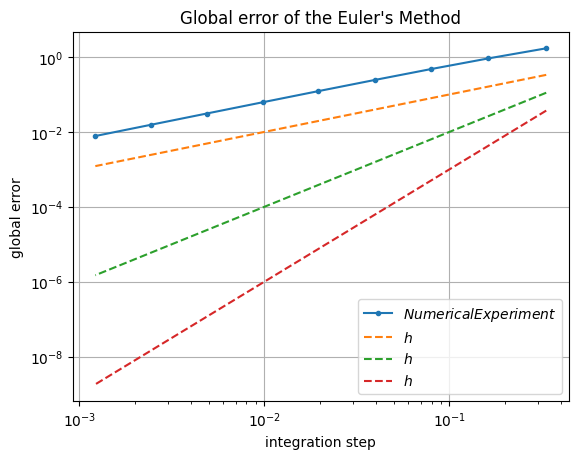

PyObject Text(24.000000000000007, 0.5, 'global error')

In [7]:

loglog(hh, gerr, marker=".", label=L"Numerical Experiment")
loglog(hh, hh.^1, linestyle="dashed", label=L"h")
loglog(hh, hh.^2, linestyle="dashed", label=L"h")
loglog(hh, hh.^3, linestyle="dashed", label=L"h")
grid(true)
title("Global error of the Euler's Method")
legend()
xlabel("integration step")
ylabel("global error")